In [10]:
from keras.datasets import imdb

max_features = 10000

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [11]:
from keras import preprocessing

maxlen = 1000

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [12]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

embedding_dim = 128

try:
    del model
except NameError:
    pass
model = Sequential()
model.add(layers.Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1, activation='sigmoid'))

# model.summary()

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 2s - loss: 0.6920 - acc: 0.5378 - val_loss: 0.6906 - val_acc: 0.5692
Epoch 2/20
20000/20000 [==============================] - 2s - loss: 0.6850 - acc: 0.6920 - val_loss: 0.6836 - val_acc: 0.6802
Epoch 3/20
20000/20000 [==============================] - 2s - loss: 0.6679 - acc: 0.7509 - val_loss: 0.6534 - val_acc: 0.7220
Epoch 4/20
20000/20000 [==============================] - 2s - loss: 0.6083 - acc: 0.7891 - val_loss: 0.5625 - val_acc: 0.7788
Epoch 5/20
20000/20000 [==============================] - 2s - loss: 0.4895 - acc: 0.8255 - val_loss: 0.4388 - val_acc: 0.8302
Epoch 6/20
20000/20000 [==============================] - 2s - loss: 0.3806 - acc: 0.8551 - val_loss: 0.3677 - val_acc: 0.8502
Epoch 7/20
20000/20000 [==============================] - 2s - loss: 0.3169 - acc: 0.8764 - val_loss: 0.3349 - val_acc: 0.8594
Epoch 8/20
20000/20000 [==============================] - 2s -

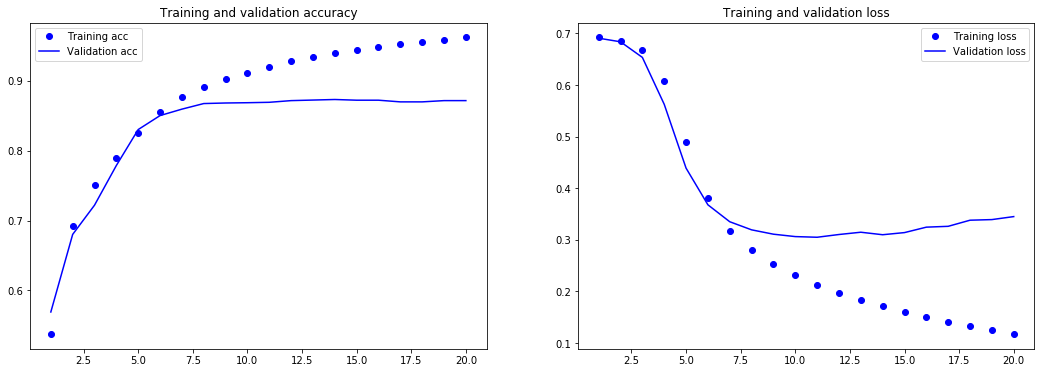

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

f, axarr = plt.subplots(1, 2, figsize=(18, 6))
axarr[0].plot(epochs, acc, 'bo', label='Training acc')
axarr[0].plot(epochs, val_acc, 'b', label='Validation acc')
axarr[0].set_title('Training and validation accuracy')
axarr[0].legend()

axarr[1].plot(epochs, loss, 'bo', label='Training loss')
axarr[1].plot(epochs, val_loss, 'b', label='Validation loss')
axarr[1].set_title('Training and validation loss')
axarr[1].legend()

In [14]:
max(history.history['val_acc'])

0.87319999999999998